# Summary Statistic for Categorical Variable

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('nyc_tree_census.csv')
print(df.shape)
df.head(3)

(50000, 6)


,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown


## Nominal Category
Because these variables’ categories have no ordering or numeric equivalents, it’s impossible to calculate a mean or median. It would also be impossible to describe spread with statistics like variance, standard deviation, a range, IQR, or percentiles, because these statistics all rely on being able to order the data in some way. However, it is still possible to calculate the mode, the most common value in the dataset.

In [2]:
# Number of unique species
df.spc_common.nunique()

131

In [3]:
# getting the mode (most common) 
df.spc_common.value_counts()

London planetree    6472
honeylocust         4798
Callery pear        4189
pin oak             3792
Norway maple        2477
                    ... 
black maple            3
Scots pine             3
smoketree              2
sassafras              2
Ohio buckeye           2
Name: spc_common, Length: 131, dtype: int64

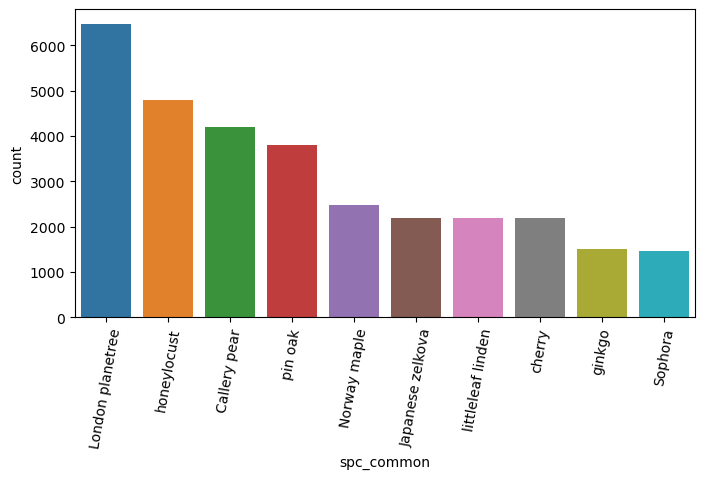

In [4]:
# top 10 'spicies'
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'spc_common', 
                  data = df, 
                  order = df['spc_common'].value_counts().iloc[:10].index)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
plt.show()

## Ordinal Categorical Variables
Ordinal categorical variables have ordered categories. For ordinal categorical variables, we can find the `mode` and `median`.

In [5]:
# unique values in health variable
df.health.unique()

array(['Good', 'Poor', 'Fair', nan], dtype=object)

In [6]:
# check the sum of null value
df.isna().sum()

tree_id            0
trunk_diam         0
status             0
health          2305
spc_common      2305
neighborhood       0
dtype: int64

In [7]:
# Drop Nan values
df  = df.dropna()
df.isna().sum()

tree_id         0
trunk_diam      0
status          0
health          0
spc_common      0
neighborhood    0
dtype: int64

In [8]:
# count of each category in healt variable
df.health.value_counts()

Good    38680
Fair     7005
Poor     2010
Name: health, dtype: int64

### Mode

In [9]:
# Summary stats
df[['spc_common', 'health' ]].describe()

,spc_common,health
count,47695,47695
unique,131,3
top,London planetree,Good
freq,6472,38680


Most frequent(mode) is category 'Good' with frequency of 38,680. 

### Median

In [10]:
correct_order = ['Poor', 'Fair', 'Good']

# Convert to categorical type
df['health'] = pd.Categorical(df['health'], correct_order, ordered=True)

# Calculate median values
median_index = np.median(df['health'].cat.codes)


health_median = correct_order[int(median_index)]
health_median

'Good'

In [11]:
df['health'].value_counts()

Good    38680
Fair     7005
Poor     2010
Name: health, dtype: int64

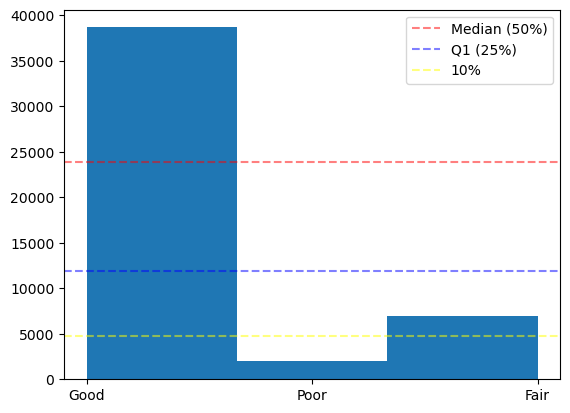

In [22]:
ax = plt.hist(df['health'], bins=3)

# Quantiles 0.50 is also median
# plt.axvline(np.quantile(df['health'], 0.50), color = 'red', linestyle='--', label = "Median")

plt.axhline(len(df.health) *.5, color = 'red', linestyle='--', label = 'Median (50%)', alpha=0.5)
plt.axhline(len(df.health) *.25, color = 'blue', linestyle='--', label = 'Q1 (25%)', alpha=0.5)
plt.axhline(len(df.health) *.1, color = 'yellow', linestyle='--', label = '10%', alpha=0.5)

plt.legend()
plt.show()

The total observation is 47,694. Dividing this by 50% we can we the median which fall under 'Good Category'.
'Fair Category' falls around 10% of our total observation.


In [12]:
# # mappings 